In [78]:
from collections import Counter

import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from wordcloud import WordCloud

In [79]:
dataset_path = "dataset/filtered_sport_category_metadata.parquet"

# load the dataset
df = pd.read_parquet(dataset_path, engine="fastparquet")

# convert the upload_date column to datetime
df["upload_date"] = pd.to_datetime(df["upload_date"], format="%Y-%m-%d %H:%M:%S")

# convert the tags into the ones with only small letters
df["tags"] = df["tags"].apply(lambda x: x.lower())

# year, month, day 
df["year"] = df["upload_date"].dt.year
df["month"] = df["upload_date"].dt.month
df["day"] = df["upload_date"].dt.day

df.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,Can I catch 100 lbs of catfish LIVE. Me and Ja...,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01,48737.0,2019,10,1
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01,19999.0,2019,10,1
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,Are you ready to enter the high fashion world ...,78.0,Y1_pK68iSYQ,603,3305.0,"catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28,58518.0,2019,9,28
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,Saltwater fishing out of Newquay Cornwall UK. ...,70.0,jF8TSo3ZfTc,1426,1889.0,"fishing,fishing uk,angling,sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21,71998.0,2019,9,21
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,My family spent 3 weeks touring England and fi...,73.0,Gp00dNaVouo,990,2699.0,"fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14,101924.0,2019,9,14


In [82]:
df_olympics = df[df["tags"].str.contains(r"olympics?", case=False, na=False)]

df_winter = df[df["tags"].str.contains(r"winter", case=False, na=False)]

df_winter_olympics = df_olympics[df_olympics["tags"].str.contains(r"winter", case=False, na=False)]
df_winter_olympics.describe()

,dislike_count,duration,like_count,upload_date,view_count,year,month,day
count,11505.000000,11545.000000,11505.000000,11545,1.154500e+04,11545.000000,11545.000000,11545.000000
mean,17.898653,935.562668,311.744198,2016-02-02 00:48:38.666089216,3.793621e+04,2015.612733,6.212819,15.783110
min,0.000000,1.000000,0.000000,2007-06-22 00:00:00,0.000000e+00,2007.000000,1.000000,1.000000
25%,0.000000,136.000000,5.000000,2013-10-03 00:00:00,8.860000e+02,2013.000000,2.000000,8.000000
50%,1.000000,221.000000,16.000000,2016-02-19 00:00:00,2.303000e+03,2016.000000,8.000000,15.000000
75%,4.000000,357.000000,56.000000,2018-08-25 00:00:00,9.410000e+03,2018.000000,9.000000,23.000000
max,32507.000000,40679.000000,217030.000000,2019-10-03 00:00:00,2.078159e+07,2019.000000,12.000000,31.000000
std,342.545787,2617.427650,4135.128856,NaN,3.469749e+05,2.678608,3.703028,8.572693


## Wordcloud

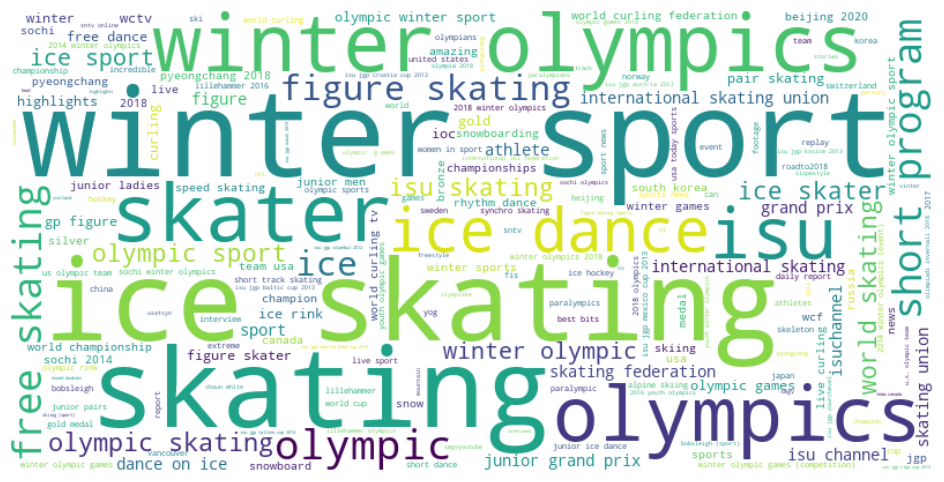

In [62]:
all_tags = [tag for sublist in df_winter_olympics['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Number of videos

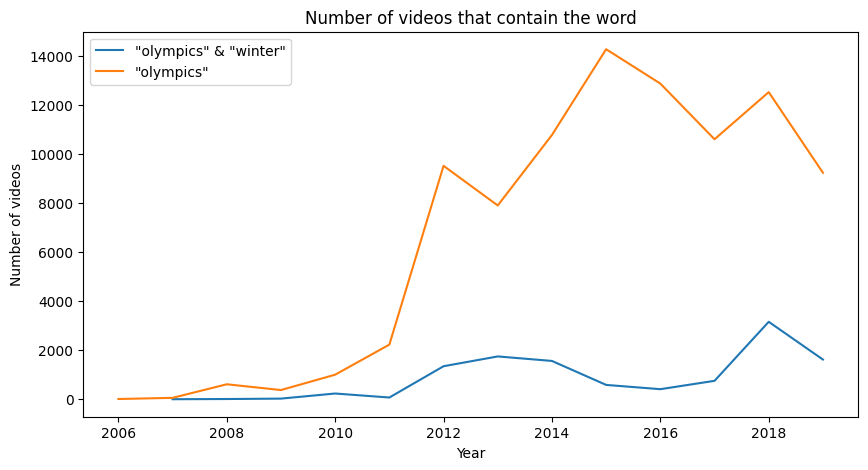

In [81]:
# plot the number of videos along the years
df_winter_olympics["year"].value_counts().sort_index().plot(kind='line', figsize=(10, 5), label='"olympics" & "winter"')

df_olympics['upload_date'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10, 5), label='"olympics"')

plt.title('Number of videos that contain the word')
plt.xlabel('Year')
plt.ylabel('Number of videos')
plt.legend()
plt.show()

## View count (by month/year)

<Axes: xlabel='year,month'>

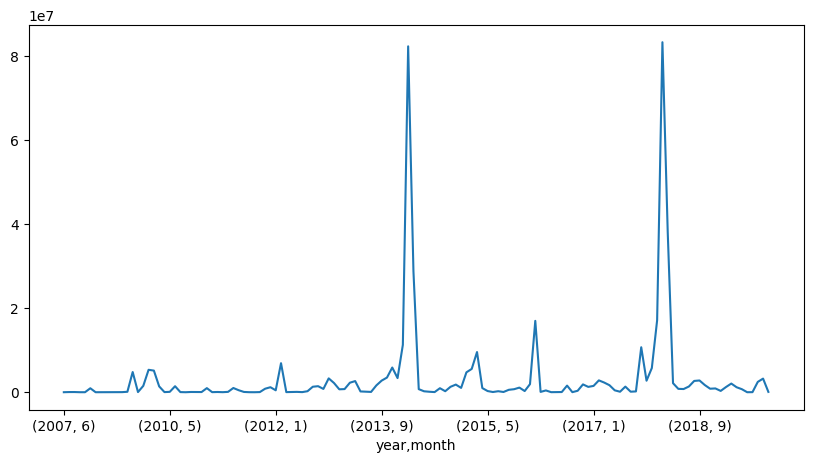

In [58]:
# plot the number of videos along the years
df_winter_olympics.groupby(["year", "month"])["view_count"].sum().plot(kind='line', figsize=(10, 5), label='"olympics" & "winter"')

## View count by month

Assume the season starts on September and ends on August next year

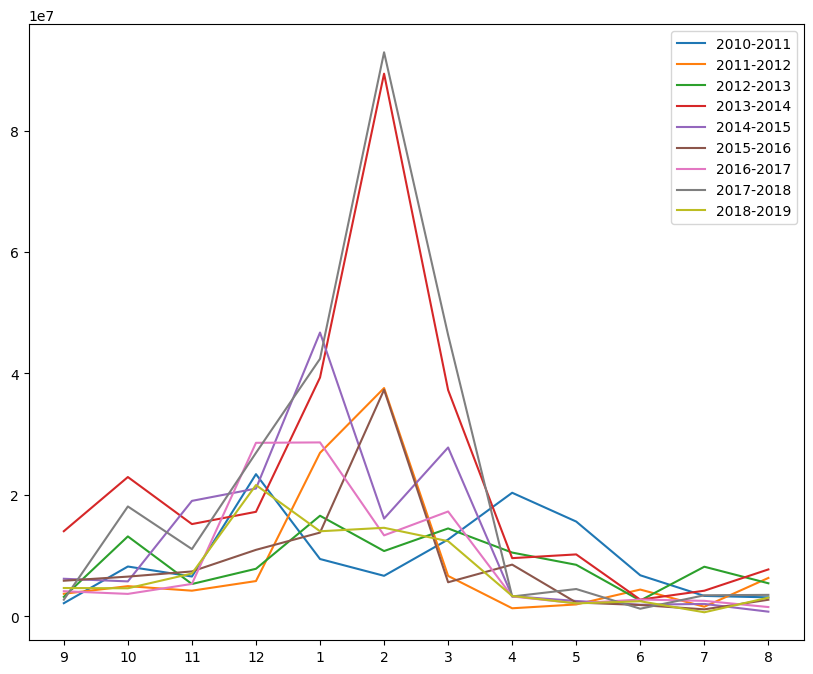

In [103]:
plt.figure(figsize=(10, 8))

# plot the number of videos along the months
for y in range(2010, 2019):
    # The season starts on September and ends on August next year
    df_season = df_winter[(df_winter["year"] == y) & (df_winter["month"] >= 9) | (df_winter["year"] == y + 1) & (df_winter["month"] <= 8)]
    
    ts_season_view_count = df_season.groupby(["year", "month"])["view_count"].sum()
    # normalize the view count by the fist month
    season_view_count = ts_season_view_count.values / 1 #ts_season_view_count.values[0]

    # plot the number of videos along the months (from September to August)
    plt.plot(["9", "10", "11", "12", "1", "2", "3", "4", "5", "6", "7", "8"], season_view_count, label=f"{y}-{y+1}")

plt.legend()
